In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)
aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
# Get 9 20x20 matrices. For each position, calculate the differences in energy between aa pairs
# Diagonals should be 0
# Symmetric about diagonals w/ opposite signs
# Get 9 x 24 x 20 x 20, then average over 24

In [2]:
data = pd.read_csv("./bindingdata.txt", delimiter = "\t", skipfooter=18)
pd.DataFrame(data)

/home/mulle/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,SEQ_ID,SEQ_PEPTIDE_NUM,SEQ_SEQUENCE,Residue,Pos,HLA A*0201,HLA A*30011,HLA B*0801,HLA A*3201,Mamu B*01,...,HLA B*1501,H-2 Kd,H-2 Db,H-2 Dd,H-2 Kk,Patr A*0301,Mamu B*08,Mamu B*03,HLA A*6802,HLA B*2705
0,29618,3064.0001,AXXXXXXXX,A,1,1986.241212,344.138927,1114.740537,2172.204511,10783.200030,...,234.477043,931.145518,12529.156450,9923.459052,3663.475288,928.127109,15172.287240,32205.15880,12329.715780,4992.288678
1,29619,3064.0002,CXXXXXXXX,C,1,7063.823365,645.862460,779.454784,6949.226313,5399.841033,...,395.571637,1250.250075,11007.798590,7878.392081,1296.591477,3316.561569,10374.247790,59629.53949,2860.247764,15093.191180
2,29620,3064.0003,DXXXXXXXX,D,1,29014.896590,9025.627626,948.214489,25246.819350,40913.787440,...,1766.613247,7545.849931,54592.083370,34598.758760,1528.222937,33845.647570,78125.000000,78125.00000,1877.938779,77906.976744
3,29621,3064.0004,EXXXXXXXX,E,1,15223.257270,3552.983642,348.036034,6891.455029,4837.590454,...,460.592314,10458.861920,60009.919820,12706.601400,854.060139,6271.931304,78125.000000,78125.00000,385.680960,19417.086490
4,29622,3064.0005,FXXXXXXXX,F,1,227.122044,1789.956110,220.865741,8854.619000,6838.599537,...,124.064501,540.968127,1805.940907,5987.125560,656.908232,2717.358798,13562.685720,69451.14337,730.171403,2889.836601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,29793,3064.0176,XXXXXXXXS,S,9,8559.034282,814.158224,5338.697757,33389.597740,66570.345820,...,4139.816897,12586.201430,78571.428571,77083.333333,78947.368421,13932.983020,33423.326100,68478.30878,3109.117139,43486.812520
176,29794,3064.0177,XXXXXXXXT,T,9,4529.713997,2232.855007,5971.744205,50887.861520,70135.785020,...,4160.395085,6329.621044,50563.427710,77083.333333,11538.802930,27806.861080,54463.775120,44649.97665,2603.474529,40065.918010
177,29795,3064.0178,XXXXXXXXV,V,9,68.112936,218.159950,209.289113,3869.588015,13009.076420,...,1027.518037,188.413685,4814.015901,10668.876210,209.208570,4202.216332,9595.479736,19738.02039,113.243248,8515.770067
178,29796,3064.0179,XXXXXXXXW,W,9,12744.490470,3805.716825,5908.477509,981.135722,12453.094750,...,2348.720969,8581.627488,78571.428571,6063.357397,9000.288014,39648.220670,78125.000000,49311.96681,2511.803557,77906.976744


In [3]:
binding_matr = []

MHCs = list(data.columns[5:])

for i in range(9):
    mhc_energies = []
    for j in range(len(MHCs)):
        energyvals = np.array([float(num) for num in data.loc[data['Pos'] == i+1, MHCs[j]]])
        mhc_energies.append(energyvals - energyvals[:,None])
    binding_matr.append(mhc_energies)
binding_matr = np.array(binding_matr)
avged_binding_matr = np.mean(binding_matr, axis=1)

In [4]:
pd.DataFrame(binding_matr[0,0], index=aas, columns=aas)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,0.000000,5077.582153,27028.655378,13237.016058,-1759.119168,556.847722,45451.352488,-115.918186,14.396549,2258.357196,-1080.306682,1385.309854,67458.203232,9865.428038,709.296042,213.248788,425.637098,1690.706520,2027.631443,145.956695
C,-5077.582153,0.000000,21951.073225,8159.433905,-6836.701321,-4520.734431,40373.770335,-5193.500339,-5063.185604,-2819.224957,-6157.888835,-3692.272299,62380.621079,4787.845885,-4368.286111,-4864.333365,-4651.945055,-3386.875633,-3049.950710,-4931.625458
D,-27028.655378,-21951.073225,0.000000,-13791.639320,-28787.774546,-26471.807656,18422.697110,-27144.573564,-27014.258829,-24770.298182,-28108.962060,-25643.345524,40429.547854,-17163.227340,-26319.359336,-26815.406590,-26603.018280,-25337.948858,-25001.023935,-26882.698683
E,-13237.016058,-8159.433905,13791.639320,0.000000,-14996.135226,-12680.168336,32214.336430,-13352.934244,-13222.619509,-10978.658862,-14317.322740,-11851.706204,54221.187174,-3371.588020,-12527.720016,-13023.767270,-12811.378960,-11546.309538,-11209.384615,-13091.059363
F,1759.119168,6836.701321,28787.774546,14996.135226,0.000000,2315.966890,47210.471656,1643.200982,1773.515717,4017.476364,678.812486,3144.429022,69217.322400,11624.547206,2468.415210,1972.367956,2184.756266,3449.825688,3786.750611,1905.075863
G,-556.847722,4520.734431,26471.807656,12680.168336,-2315.966890,0.000000,44894.504766,-672.765908,-542.451173,1701.509474,-1637.154404,828.462132,66901.355510,9308.580316,152.448320,-343.598934,-131.210624,1133.858798,1470.783721,-410.891027
H,-45451.352488,-40373.770335,-18422.697110,-32214.336430,-47210.471656,-44894.504766,0.000000,-45567.270674,-45436.955939,-43192.995292,-46531.659170,-44066.042634,22006.850744,-35585.924450,-44742.056446,-45238.103700,-45025.715390,-43760.645968,-43423.721045,-45305.395793
I,115.918186,5193.500339,27144.573564,13352.934244,-1643.200982,672.765908,45567.270674,0.000000,130.314735,2374.275382,-964.388496,1501.228040,67574.121418,9981.346224,825.214228,329.166974,541.555284,1806.624706,2143.549629,261.874881
K,-14.396549,5063.185604,27014.258829,13222.619509,-1773.515717,542.451173,45436.955939,-130.314735,0.000000,2243.960647,-1094.703231,1370.913305,67443.806683,9851.031489,694.899493,198.852239,411.240549,1676.309971,2013.234894,131.560146
L,-2258.357196,2819.224957,24770.298182,10978.658862,-4017.476364,-1701.509474,43192.995292,-2374.275382,-2243.960647,0.000000,-3338.663878,-873.047342,65199.846036,7607.070842,-1549.061154,-2045.108408,-1832.720098,-567.650676,-230.725753,-2112.400501


In [5]:
# changing from A to A gives nothing, changing from A to C decreases strength by 2719 on avg over all MHC
pd.DataFrame(avged_binding_matr[0], index=aas, columns=aas)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,0.000000,-2719.322288,16189.621517,6518.818882,-4633.687328,3467.338275,-3720.614601,-4426.847012,376.281104,-4204.601266,-7955.387202,-1104.578100,26872.771095,7084.848088,-1368.739598,-3974.729029,318.215606,-746.904885,-1579.179294,-7269.056248
C,2719.322288,0.000000,18908.943805,9238.141170,-1914.365040,6186.660563,-1001.292314,-1707.524725,3095.603392,-1485.278979,-5236.064914,1614.744187,29592.093383,9804.170376,1350.582690,-1255.406741,3037.537893,1972.417403,1140.142994,-4549.733960
D,-16189.621517,-18908.943805,0.000000,-9670.802635,-20823.308845,-12722.283242,-19910.236118,-20616.468529,-15813.340413,-20394.222784,-24145.008719,-17294.199618,10683.149578,-9104.773429,-17558.361115,-20164.350546,-15871.405912,-16936.526402,-17768.800811,-23458.677765
E,-6518.818882,-9238.141170,9670.802635,0.000000,-11152.506210,-3051.480607,-10239.433484,-10945.665895,-6142.537778,-10723.420149,-14474.206084,-7623.396983,20353.952213,566.029205,-7887.558480,-10493.547911,-6200.603277,-7265.723767,-8097.998176,-13787.875130
F,4633.687328,1914.365040,20823.308845,11152.506210,0.000000,8101.025603,913.072726,206.840315,5009.968432,429.086061,-3321.699874,3529.109227,31506.458423,11718.535416,3264.947730,658.958299,4951.902933,3886.782443,3054.508034,-2635.368920
G,-3467.338275,-6186.660563,12722.283242,3051.480607,-8101.025603,0.000000,-7187.952876,-7894.185287,-3091.057171,-7671.939542,-11422.725477,-4571.916376,23405.432820,3617.509813,-4836.077873,-7442.067304,-3149.122670,-4214.243160,-5046.517569,-10736.394523
H,3720.614601,1001.292314,19910.236118,10239.433484,-913.072726,7187.952876,0.000000,-706.232411,4096.895705,-483.986665,-4234.772601,2616.036501,30593.385697,10805.462689,2351.875003,-254.114428,4038.830207,2973.709717,2141.435308,-3548.441646
I,4426.847012,1707.524725,20616.468529,10945.665895,-206.840315,7894.185287,706.232411,0.000000,4803.128116,222.245746,-3528.540189,3322.268912,31299.618108,11511.695100,3058.107414,452.117984,4745.062618,3679.942128,2847.667719,-2842.209235
K,-376.281104,-3095.603392,15813.340413,6142.537778,-5009.968432,3091.057171,-4096.895705,-4803.128116,0.000000,-4580.882370,-8331.668306,-1480.859204,26496.489991,6708.566984,-1745.020702,-4351.010133,-58.065499,-1123.185989,-1955.460398,-7645.337352
L,4204.601266,1485.278979,20394.222784,10723.420149,-429.086061,7671.939542,483.986665,-222.245746,4580.882370,0.000000,-3750.785935,3100.023166,31077.372362,11289.449354,2835.861668,229.872238,4522.816872,3457.696382,2625.421973,-3064.454981


In [6]:
def get_proportional_matrix(MHCs, data):
    total = []

    for i in range(9):
        mhc_energies = []
        for j in range(len(MHCs)):
            energyvals = np.array([float(num) for num in data.loc[data['Pos'] == i+1, MHCs[j]]])
            mhc_energies.append(energyvals)
        total.append(mhc_energies)
    total = np.array(total)
    tot = np.mean(total, axis=1)
    aa_matrices = []
    for i in range(9):
        mat = tot[i]
        aa_matrices.append(mat / mat[:,None])
    return np.array(aa_matrices)

def calculate_reactions(matrix, num_peptides=1000000, num_tcrs=1000000, num_sims=100000, N=9, 
                        aas=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'],
                       peptides=None):
    tcrs = np.zeros(num_tcrs, dtype=object)
    if peptides is None:
        peptides = np.zeros(num_peptides, dtype=object)
        for i in range(len(peptides)):
            peptides[i] = ''.join(random.choice(aas) for _ in range(N))
            tcrs[i] = ''.join(random.choice(aas) for _ in range(N))
    else:
        for i in range(len(tcrs)):
            tcrs[i] = ''.join(random.choice(aas) for _ in range(N))

    reactions = np.zeros(num_sims)
    for sim in range(num_sims):
        reaction = 1.0
        peptide = random.choice(peptides)
        tcr = random.choice(tcrs)
        for i in range(len(peptide)):
            peptide_aa = aas.index(peptide[i])
            tcr_aa = aas.index(tcr[i])
            reaction *= matrix[i, tcr_aa, peptide_aa]

        # reaction is geometric mean of aa interactions
        reaction = reaction**(1/len(peptide))
        reactions[sim] = reaction
    return reactions

In [7]:
MHCs = list(data.columns[5:])
mice_MHCs = MHCs[15:19]
avged_aa_matrices = get_proportional_matrix(MHCs, data)
avged_reactions = calculate_reactions(avged_aa_matrices)
avged_mice_matrices = get_proportional_matrix(mice_MHCs, data)
avged_mice_reactions = calculate_reactions(avged_mice_matrices)

reaction_distribs = {'avged':avged_reactions}
all_aa_matrices = {'avged': avged_aa_matrices}
mice_reaction_distribs = {'avged': avged_mice_reactions}
mice_aa_matrices = {'avged': avged_mice_matrices}

for mhc in MHCs:
    aa_matrices = get_proportional_matrix([mhc], data)
    reactions = calculate_reactions(aa_matrices)
    reaction_distribs[mhc] = reactions
    all_aa_matrices[mhc] = aa_matrices
    if mhc in mice_MHCs:
        mice_reaction_distribs[mhc] = reactions
        mice_aa_matrices[mhc] = aa_matrices

In [8]:
for i in range(9):
    strname = "proportional_binding_matrix_H2_averaged_position" + str(i+1) + ".csv"
    pd.DataFrame(mice_aa_matrices['avged'][i], index=aas, columns=aas).to_csv('./' + strname)
#for i in range(9):
#    strname = "additive_binding_matrix_position" + str(i+1) + ".csv"
#    pd.DataFrame(avged_binding_matr[i], index=aas, columns=aas).to_csv('./' + strname)
with open('H2_proportional_binding_matrices.npy', 'wb') as f:
    np.save(f, mice_aa_matrices['avged'])

All MHC averaged:
Mean: 1.027730000970109
Median: 1.0000440765244258
Standard Deviation: 0.24386926269613918


H-2 averaged:
Mean: 1.0567372874271812
Median: 0.9993697839658496
Standard Deviation: 0.3628296903301295


H-2 Db:
Mean: 1.1086421411868468
Median: 1.0032185959947328
Standard Deviation: 0.5289288938561388


H-2 Kd:
Mean: 1.1588740249602694
Median: 1.000372994018535
Standard Deviation: 0.6871629974932973


H-2 Kk:
Mean: 1.1914880425150904
Median: 1.0015546825660127
Standard Deviation: 0.8127404488175102


H-2 Dd:
Mean: 1.100743052254246
Median: 0.9996928508410474
Standard Deviation: 0.5169714808761189




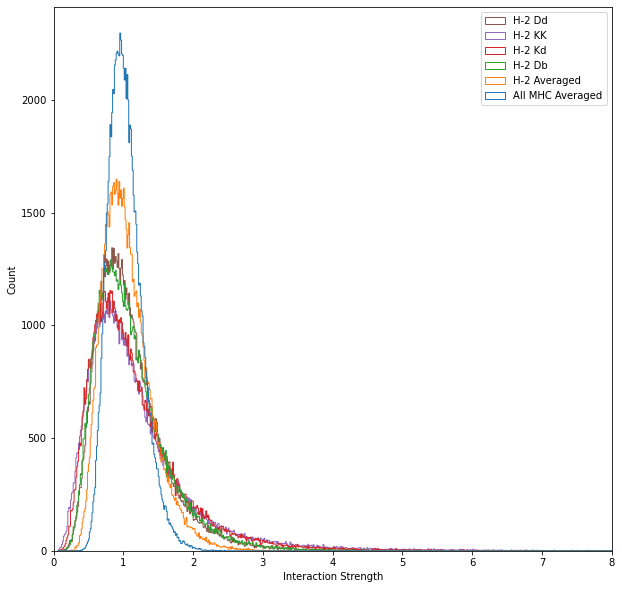

In [9]:
def print_stats(n, name):
    print(name)
    print("Mean: " + str(np.mean(n)))
    print("Median: " + str(np.median(n)))
    print("Standard Deviation: " + str(np.std(n)))
    print("\n")

hists = np.array([reaction_distribs['avged'], mice_reaction_distribs['avged'], mice_reaction_distribs['H-2 Db'], mice_reaction_distribs['H-2 Kd'], mice_reaction_distribs['H-2 Kk'], mice_reaction_distribs['H-2 Dd']]).T
fig = plt.figure(figsize=(10,10))
print_stats(reaction_distribs['avged'], "All MHC averaged:")
print_stats(mice_reaction_distribs['avged'], "H-2 averaged:")
print_stats(mice_reaction_distribs['H-2 Db'], "H-2 Db:")
print_stats(mice_reaction_distribs['H-2 Kd'], "H-2 Kd:")
print_stats(mice_reaction_distribs['H-2 Kk'], "H-2 Kk:")
print_stats(mice_reaction_distribs['H-2 Dd'], "H-2 Dd:")

ax2 = fig.add_subplot(111)
ax2.hist(hists, bins="auto", histtype='step', stacked=False, fill=False,label = ['All MHC Averaged', 'H-2 Averaged', 'H-2 Db', 'H-2 Kd', 'H-2 KK', 'H-2 Dd'])
ax2.set_xlabel("Interaction Strength")
ax2.set_ylabel("Count")
ax2.set_xlim([0,8])
ax2.legend()

plt.show()

In [10]:
s = "MHC | Mean | Median | Std \n ------------ | -------- | -------- | ------- \n"
for k,v in mice_reaction_distribs.items():
    s = s + str(k) + "|" + str(np.round(np.mean(v), 4)) + "|" + str(np.round(np.median(v), 4)) + "|" + str(np.round(np.std(v), 4)) + " \n "
print(s)

MHC | Mean | Median | Std 
 ------------ | -------- | -------- | ------- 
avged|1.0567|0.9994|0.3628 
 H-2 Kd|1.1589|1.0004|0.6872 
 H-2 Db|1.1086|1.0032|0.5289 
 H-2 Dd|1.1007|0.9997|0.517 
 H-2 Kk|1.1915|1.0016|0.8127 
 


In [11]:
s = "MHC | Mean | Median | Std \n ------------ | -------- | -------- | ------- \n"
for k,v in reaction_distribs.items():
    s = s + str(k) + "|" + str(np.round(np.mean(v), 4)) + "|" + str(np.round(np.median(v), 4)) + "|" + str(np.round(np.std(v), 4)) + " \n "
print(s)

MHC | Mean | Median | Std 
 ------------ | -------- | -------- | ------- 
avged|1.0277|1.0|0.2439 
 HLA A*0201|1.1656|0.9994|0.6966 
 HLA A*30011|1.142|1.0|0.6315 
 HLA B*0801|1.1482|0.997|0.65 
 HLA A*3201|1.1207|0.9978|0.5678 
 Mamu B*01|1.0948|1.0007|0.4889 
 HLA B*1503|1.154|1.0002|0.6661 
 HLA B*5801|1.1626|1.0017|0.6825 
 HLA B*5802|1.1032|0.9981|0.5154 
 Patr A*0401|1.2004|0.9996|0.8027 
 HLA B*0702|1.129|1.0022|0.5915 
 HLA B*3501|1.0984|0.9971|0.5099 
 HLA B*5301|1.1681|1.0009|0.7021 
 HLA B*5401|1.2027|0.9957|0.8132 
 HLA B*5101|1.0846|1.0003|0.4648 
 HLA B*1501|1.1147|1.0005|0.5438 
 H-2 Kd|1.1589|1.0004|0.6872 
 H-2 Db|1.1086|1.0032|0.5289 
 H-2 Dd|1.1007|0.9997|0.517 
 H-2 Kk|1.1915|1.0016|0.8127 
 Patr A*0301|1.1561|0.9985|0.6744 
 Mamu B*08|1.0744|1.0008|0.4296 
 Mamu B*03|1.0442|1.0008|0.3147 
 HLA A*6802|1.1436|1.0009|0.6303 
 HLA B*2705|1.0976|1.0007|0.5005 
 


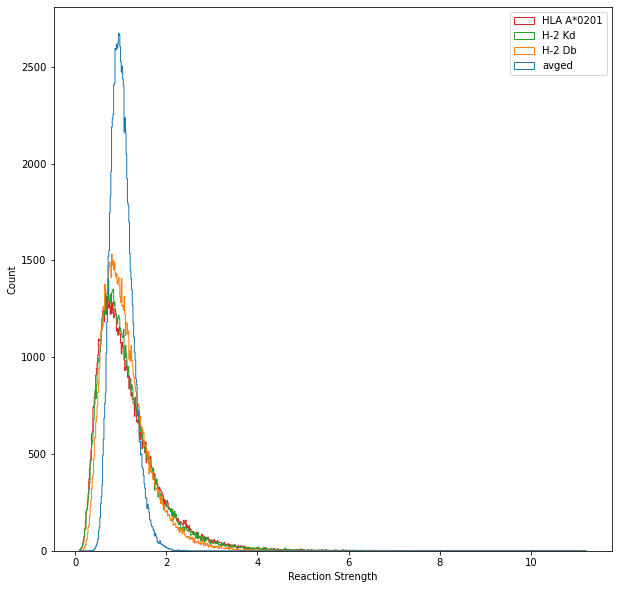

In [12]:
hists = np.array([reaction_distribs['avged'], reaction_distribs['H-2 Db'], reaction_distribs['H-2 Kd'], reaction_distribs['HLA A*0201']]).T
fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(111)
ax2.hist(hists, bins="auto", histtype='step', stacked=False, fill=False,label = ['avged', 'H-2 Db', 'H-2 Kd', 'HLA A*0201'])
ax2.set_xlabel("Reaction Strength")
ax2.set_ylabel("Count")
ax2.legend()

plt.show()

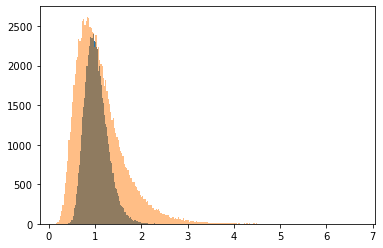

In [13]:
plt.hist(reaction_distribs['avged'], bins='auto')
plt.hist(reaction_distribs['H-2 Db'], bins='auto', alpha=0.5)
plt.show()

In [14]:
len(all_aa_matrices)
max_interact_vals = np.ones((len(all_aa_matrices), len(all_aa_matrices['avged'])))
ctr = 0
for mhc in all_aa_matrices:
    for pos in range(len(all_aa_matrices['avged'])):
        max_interact_vals[ctr][pos] = np.max(all_aa_matrices[mhc][pos])
    ctr += 1

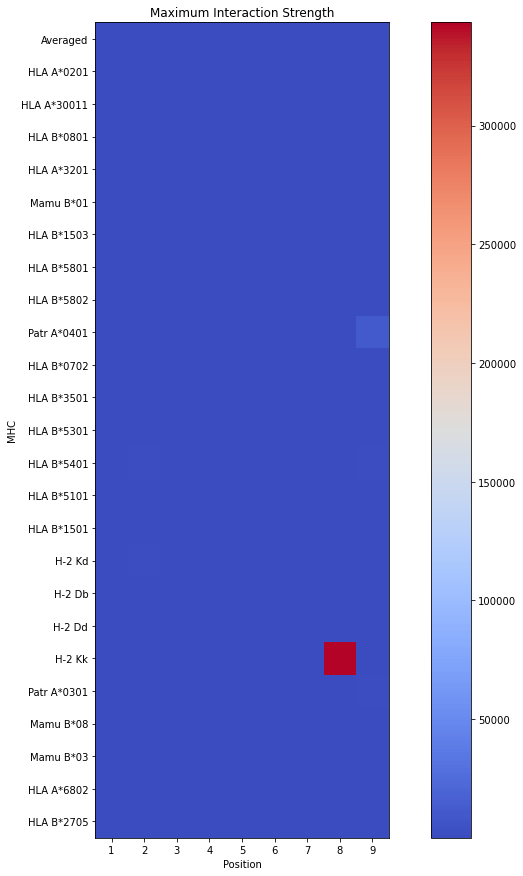

In [15]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
mat1 = ax1.imshow(max_interact_vals, cmap='coolwarm')
fig.colorbar(mat1, ax = ax1)

pos = [1,2,3,4,5,6,7,8,9]
MHCs = ['Averaged'] + list(data.columns[5:])
xaxis = np.arange(len(pos))
yaxis = np.arange(len(MHCs))
ax1.set_xticks(xaxis)
ax1.set_yticks(yaxis)
ax1.set_xticklabels(pos)
ax1.set_yticklabels(MHCs)
ax1.set_title("Maximum Interaction Strength")
ax1.set_xlabel("Position")
ax1.set_ylabel("MHC")

plt.show()

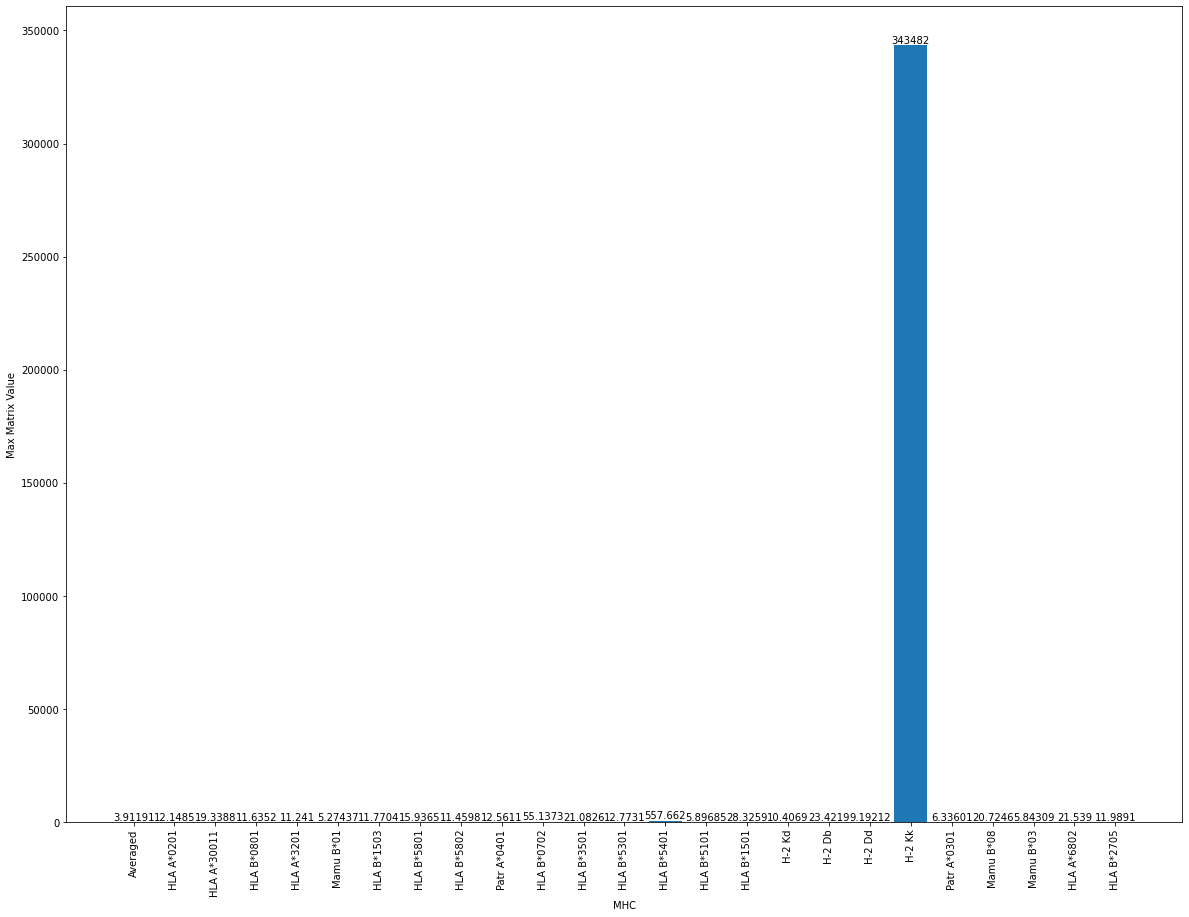

In [16]:
MHCs = ['Averaged'] + list(data.columns[5:])
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
plt.xticks(rotation='vertical')
ax1.bar(MHCs,max_interact_vals[:,7])
ax1.set_xlabel("MHC")
ax1.set_ylabel("Max Matrix Value")
ax1.bar_label(ax1.containers[0])
plt.show()

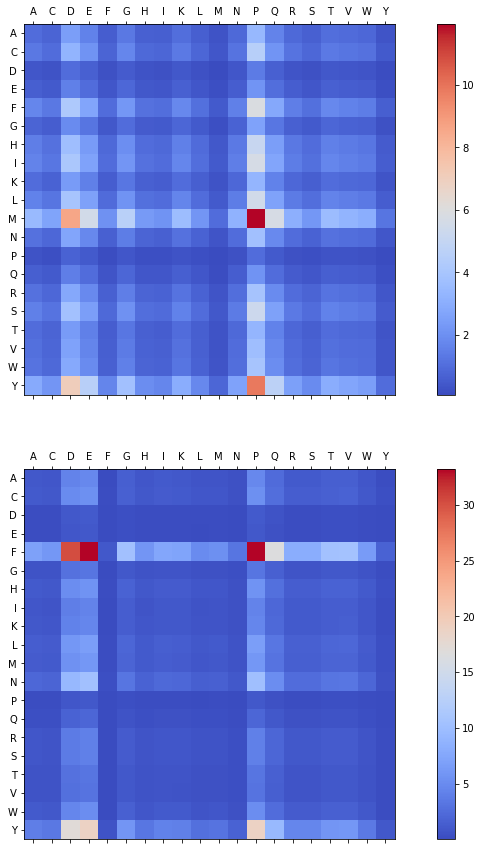

In [17]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
mat1 = ax1.matshow(all_aa_matrices['avged'][0], cmap='coolwarm')
mat2 = ax2.matshow(all_aa_matrices['H-2 Db'][0], cmap='coolwarm')
fig.colorbar(mat1, ax = ax1)
fig.colorbar(mat2, ax = ax2)
#fig.suptitle("Reaction Data",fontsize=16)

xaxis = np.arange(len(aas))
ax1.set_xticks(xaxis)
ax1.set_yticks(xaxis)
ax1.set_xticklabels(aas)
ax1.set_yticklabels(aas)

ax2.set_xticks(xaxis)
ax2.set_yticks(xaxis)
ax2.set_xticklabels(aas)
ax2.set_yticklabels(aas)

plt.show()

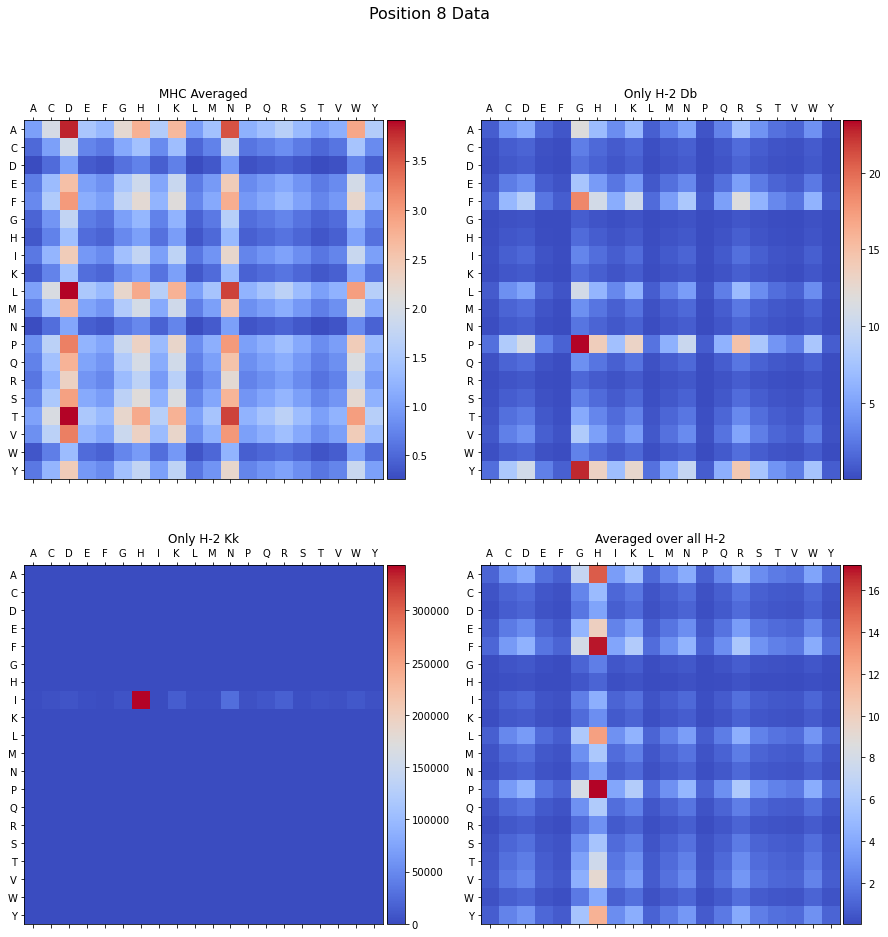

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
mat1 = ax.matshow(all_aa_matrices['avged'][7], cmap='coolwarm')

xaxis = np.arange(len(aas))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(aas)
ax.set_yticklabels(aas)
ax.set_title("MHC Averaged")

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(mat1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(222)
mat2 = ax2.matshow(mice_aa_matrices['H-2 Db'][7], cmap='coolwarm')

ax2.set_xticks(xaxis)
ax2.set_yticks(xaxis)
ax2.set_xticklabels(aas)
ax2.set_yticklabels(aas)
ax2.set_title("Only H-2 Db")

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(mat2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(223)
mat3 = ax3.matshow(mice_aa_matrices['H-2 Kk'][7], cmap='coolwarm')

ax3.set_xticks(xaxis)
ax3.set_yticks(xaxis)
ax3.set_xticklabels(aas)
ax3.set_yticklabels(aas)
ax3.set_title("Only H-2 Kk")

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(mat3, cax=cax, orientation='vertical')

ax4 = fig.add_subplot(224)
mat4 = ax4.matshow(mice_aa_matrices['avged'][7], cmap='coolwarm')

ax4.set_xticks(xaxis)
ax4.set_yticks(xaxis)
ax4.set_xticklabels(aas)
ax4.set_yticklabels(aas)
ax4.set_title("Averaged over all H-2")

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(mat4, cax=cax, orientation='vertical')
fig.suptitle("Position 8 Data",fontsize=16)

plt.show()

In [19]:
all_aa_matrices['H-2 Kk'][7][7]

array([2.17314127e+03, 4.77181550e+03, 6.87294367e+03, 3.88447648e+03,
       1.77895693e+03, 5.55486146e+03, 3.43482399e+05, 1.00000000e+00,
       1.40512479e+04, 3.31034600e+03, 3.65458367e+03, 2.71415138e+04,
       4.05494280e+03, 9.21113507e+03, 1.72641425e+04, 3.72730890e+03,
       6.39065380e+03, 4.62234299e+03, 9.79859455e+03, 4.64289546e+03])

In [20]:
real_peptides = np.loadtxt("./validpeptides.txt", dtype=object)

In [21]:
MHCs = list(data.columns[5:])
aa_matrices = get_proportional_matrix(MHCs, data)
reactions = calculate_reactions(aa_matrices, peptides=real_peptides)
print("Mean reaction strength: " + str(np.mean(reactions)))
print("Median reaction strength: " + str(np.median(reactions)))
print("Standard deviation of reaction strength: " + str(np.std(reactions)))
#pd.DataFrame(aa_matrices[0], index=aas, columns=aas)

Mean reaction strength: 0.8063550686811993
Median reaction strength: 0.7847840733078206
Standard deviation of reaction strength: 0.16874546941387683


In [22]:
MHCs = [data.columns[-8]]
aa_matrices_2 = get_proportional_matrix(MHCs, data)
reactions_2 = calculate_reactions(aa_matrices_2)
print("Mean reaction strength: " + str(np.mean(reactions_2)))
print("Median reaction strength: " + str(np.median(reactions_2)))
print("Standard deviation of reaction strength: " + str(np.std(reactions_2)))
#pd.DataFrame(aa_matrices_2[0], index=aas, columns=aas)

Mean reaction strength: 1.1072372512127953
Median reaction strength: 1.000377704159852
Standard deviation of reaction strength: 0.5249682148386832


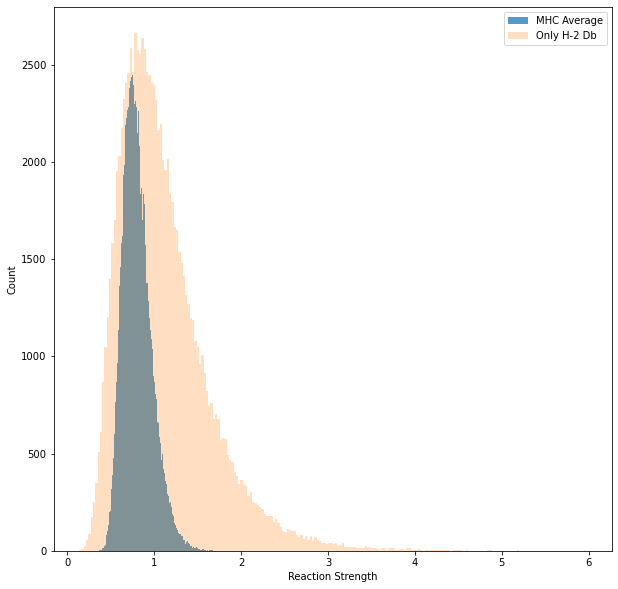

In [23]:
fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(111)
cax1 = ax2.hist(reactions, bins="auto", alpha=0.75, label="MHC Average")
cax2 = ax2.hist(reactions_2, bins="auto", alpha=0.25, label="Only H-2 Db")
ax2.set_xlabel("Reaction Strength")
ax2.set_ylabel("Count")
ax2.legend()

plt.show()